In [20]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv('churn_raw_data.csv',dtype={'locationid':np.int64}) 

df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [24]:
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [25]:
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

<Figure size 1600x700 with 0 Axes>

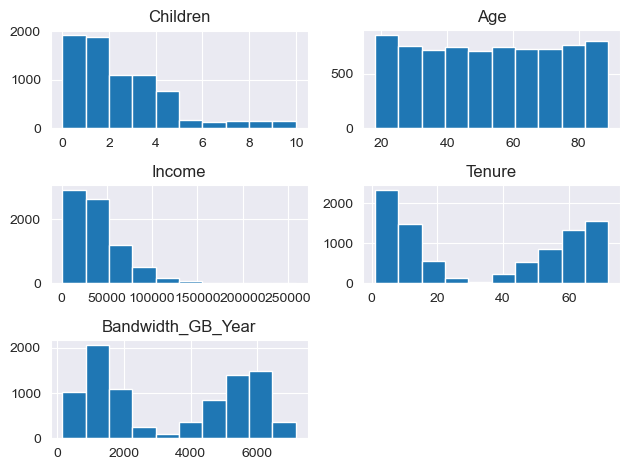

In [26]:
plt.figure(figsize=(16,7))
df.hist(column = ['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year'])
plt.tight_layout()
plt.show()

In [27]:
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])
df['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mode()[0])
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].mode()[0])

In [28]:
df.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [29]:
outliers_old = ['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
outliers_old

['Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

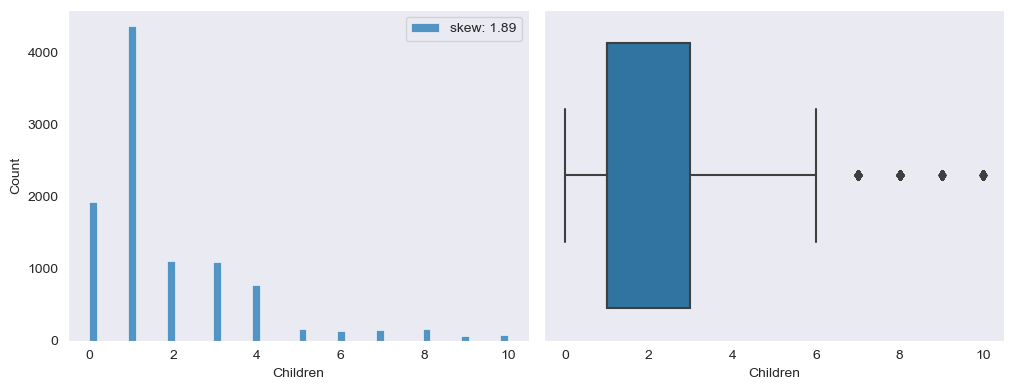

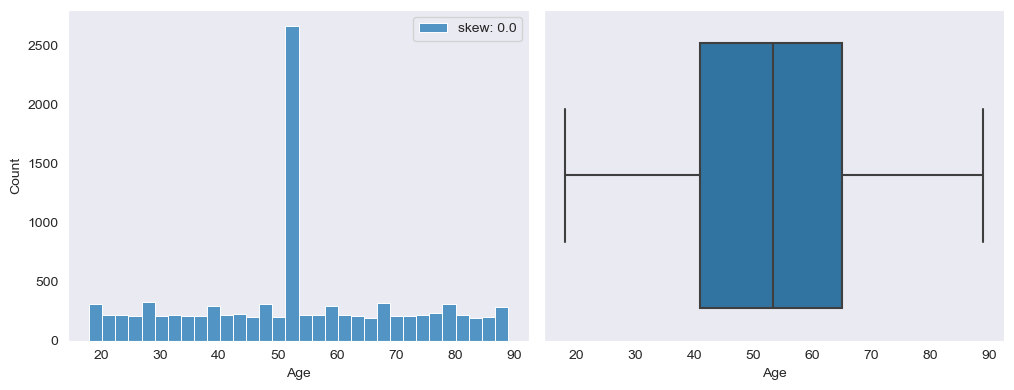

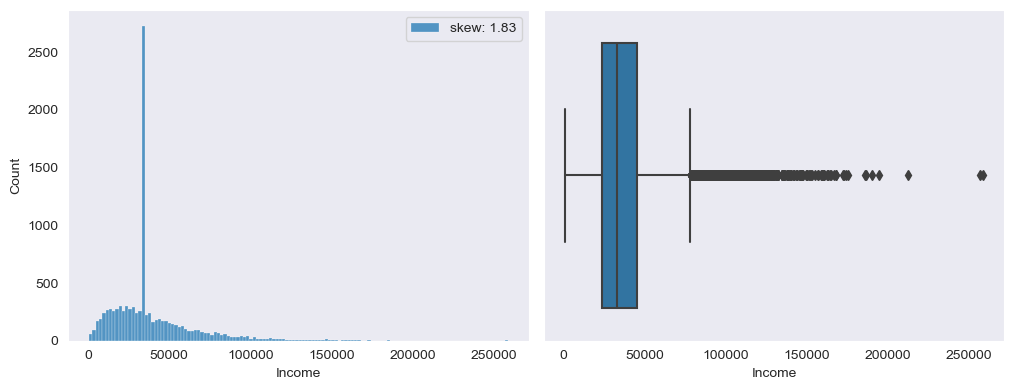

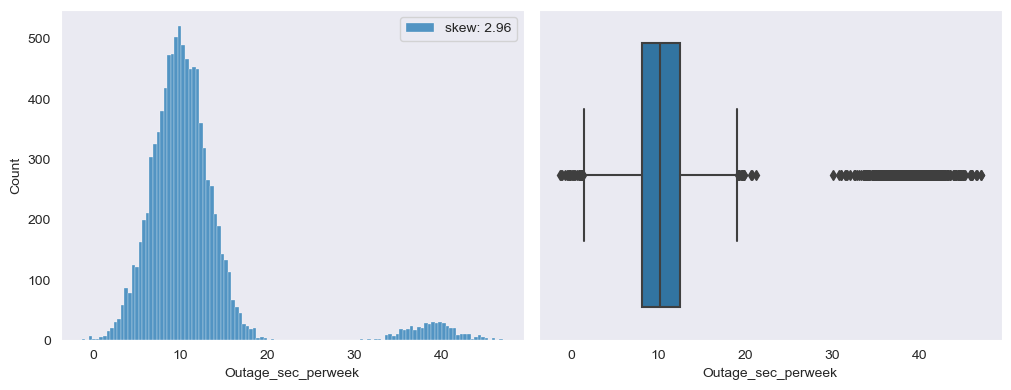

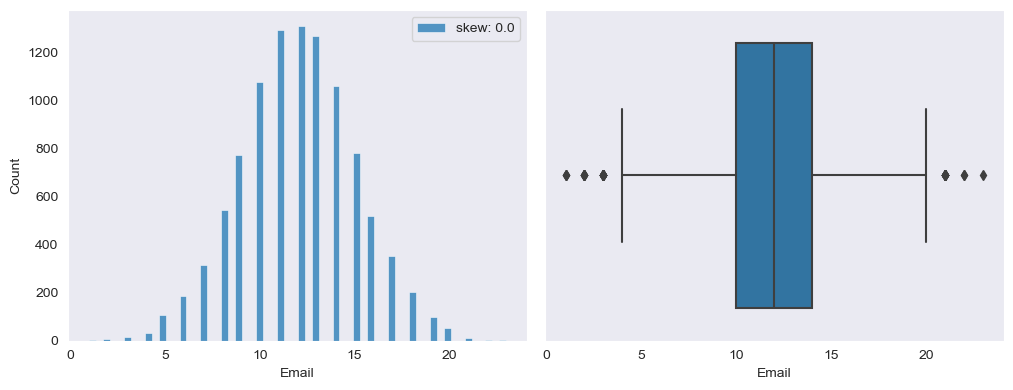

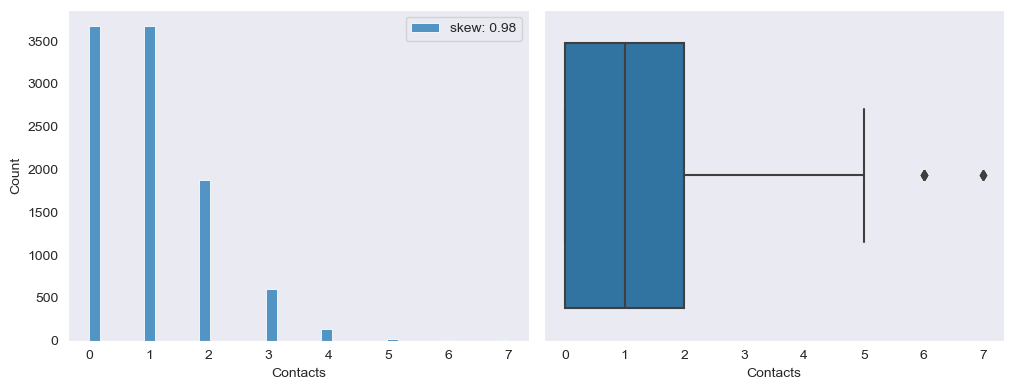

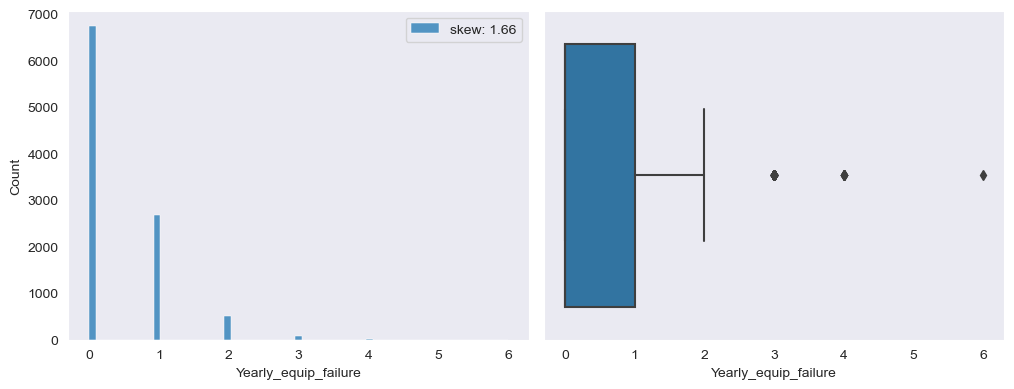

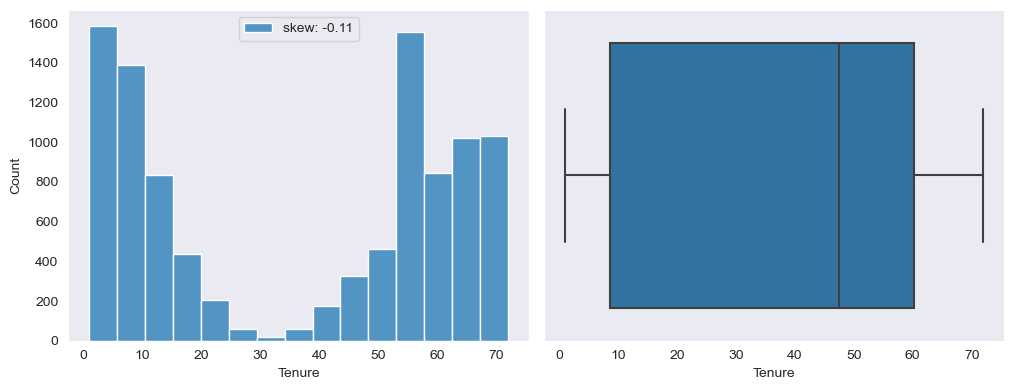

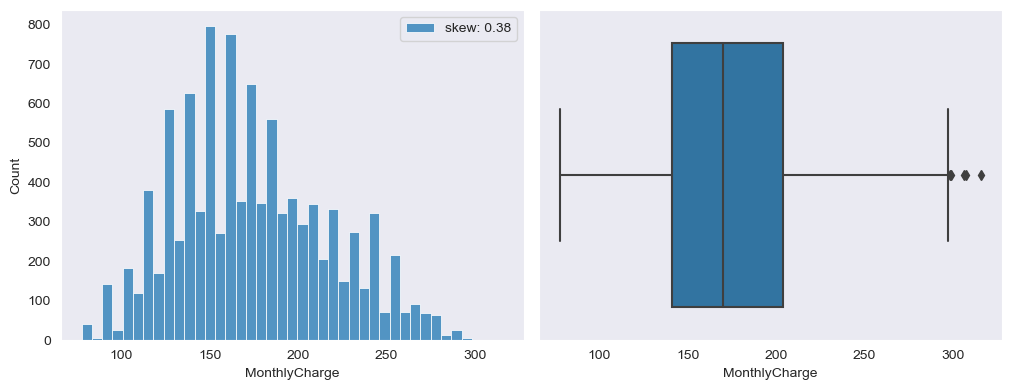

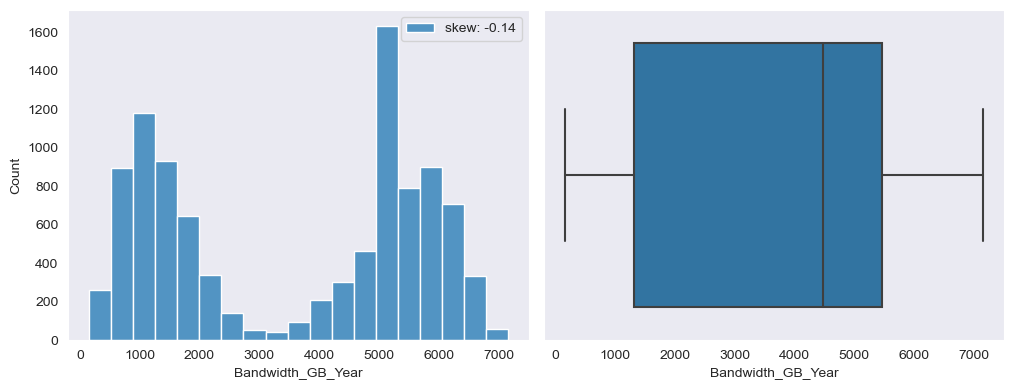

In [30]:
sns.set_style('dark')
for col in outliers_old:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [31]:
outliers_new = ['Children', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge']
outliers_new 

['Children',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'MonthlyCharge']

In [32]:
def val_outliers_IQR(df):
    
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        IQR = q3 - q1

        out_lier = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
        return out_lier

In [33]:
out_num = val_outliers_IQR(df['Children'])

In [34]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 451
max outlier value: 10.0
min outlier value: 7.0


10       7.0
30       9.0
97      10.0
131      8.0
144     10.0
        ... 
9871    10.0
9901     9.0
9940     7.0
9946     8.0
9982     7.0
Name: Children, Length: 451, dtype: float64

In [35]:
out_num = val_outliers_IQR(df['Income'])

In [36]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 759
max outlier value: 258900.7
min outlier value: 78272.96


12       83671.08
13      115114.57
15       89061.45
23       79699.62
46      132116.33
          ...    
9900     80884.80
9921    109058.00
9922     89514.55
9937     78958.46
9987    102629.60
Name: Income, Length: 759, dtype: float64

In [37]:
out_num = val_outliers_IQR(df['Outage_sec_perweek'])

In [38]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 539
max outlier value: 47.04928
min outlier value: -1.348571


28      43.927052
36      44.725202
40      38.905335
61      39.883903
72      32.030945
          ...    
9895    40.684860
9907    38.524730
9945    39.337010
9950    40.974290
9980    30.732980
Name: Outage_sec_perweek, Length: 539, dtype: float64

In [39]:
out_num = val_outliers_IQR(df['Email'])

In [40]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 38
max outlier value: 23
min outlier value: 1


92       3
258     21
795      2
1152     2
1381     1
1399     2
1473    23
1746    22
1808    21
2195     3
2275     3
2328    21
2806    21
3188    21
3266    21
3593     3
4817     3
5558    21
5844     3
6320     1
6330     3
6817    21
7250    21
7251    21
7408     2
7653    21
7950     3
8365     1
8630     3
8710     3
8790     3
8837     3
8948     2
9076     3
9248     2
9334    21
9339     3
9475    22
Name: Email, dtype: int64

In [41]:
out_num = val_outliers_IQR(df['Contacts'])

In [42]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 8
max outlier value: 7
min outlier value: 6


426     6
4673    6
4811    7
5840    6
7746    7
9380    7
9713    6
9750    6
Name: Contacts, dtype: int64

In [43]:
out_num = val_outliers_IQR(df['Yearly_equip_failure'])

In [44]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 94
max outlier value: 6
min outlier value: 3


8       3
20      3
171     3
592     3
621     3
       ..
9623    4
9674    3
9763    4
9769    3
9967    3
Name: Yearly_equip_failure, Length: 94, dtype: int64

In [45]:
out_num = val_outliers_IQR(df['MonthlyCharge'])

In [46]:
print('number of outliers: '+ str(len(out_num)))
print('max outlier value: '+ str(out_num.max()))
print('min outlier value: '+ str(out_num.min()))
out_num

number of outliers: 5
max outlier value: 315.8786
min outlier value: 298.1730235


798     299.206164
927     307.528124
1430    298.173023
3746    315.878600
4700    306.268000
Name: MonthlyCharge, dtype: float64

In [47]:
df_cop = df.copy()

In [48]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                  np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [49]:
iqr_capping(df_cop, outliers_new, 1.5)

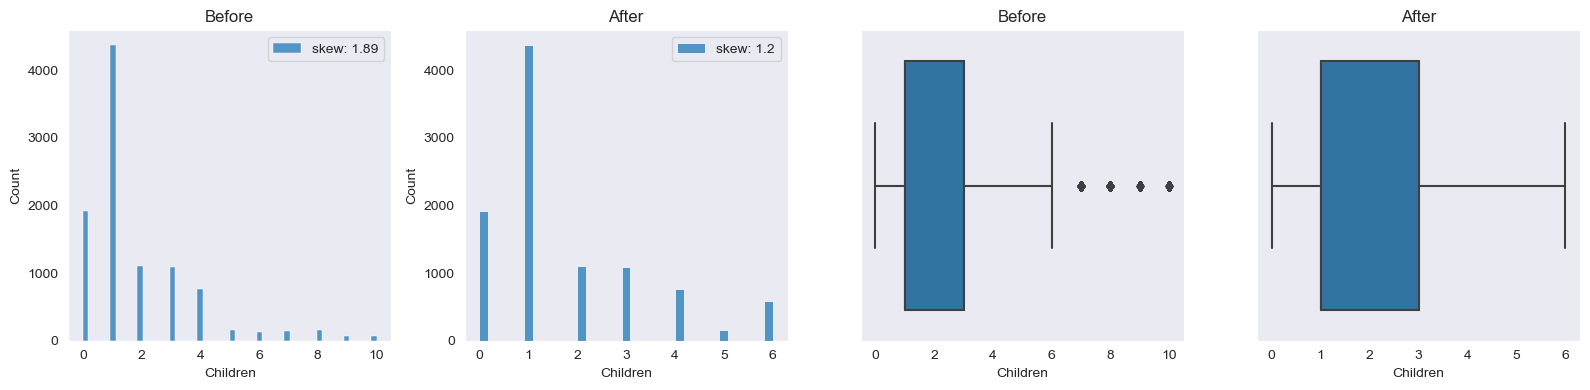

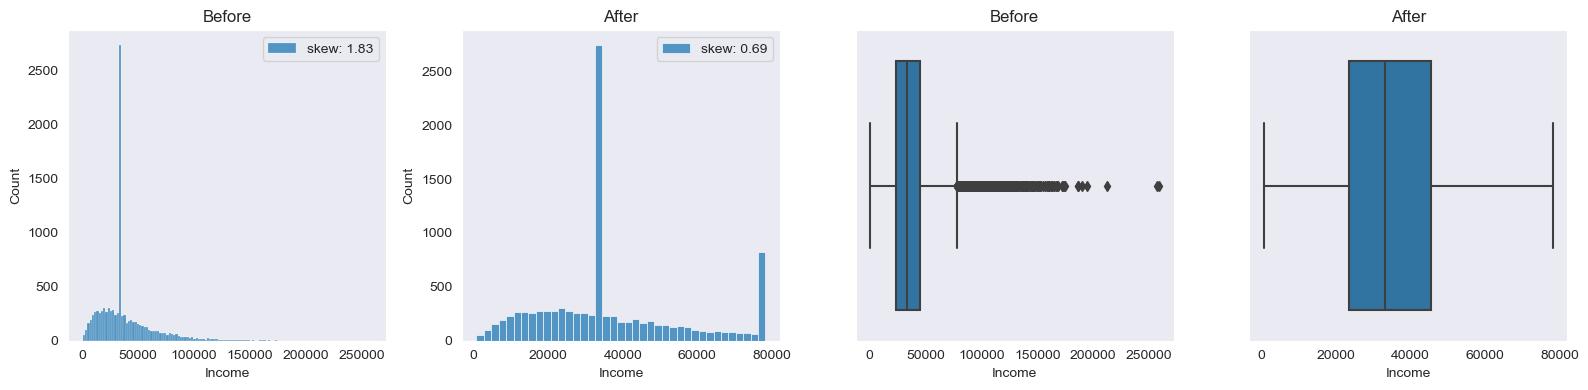

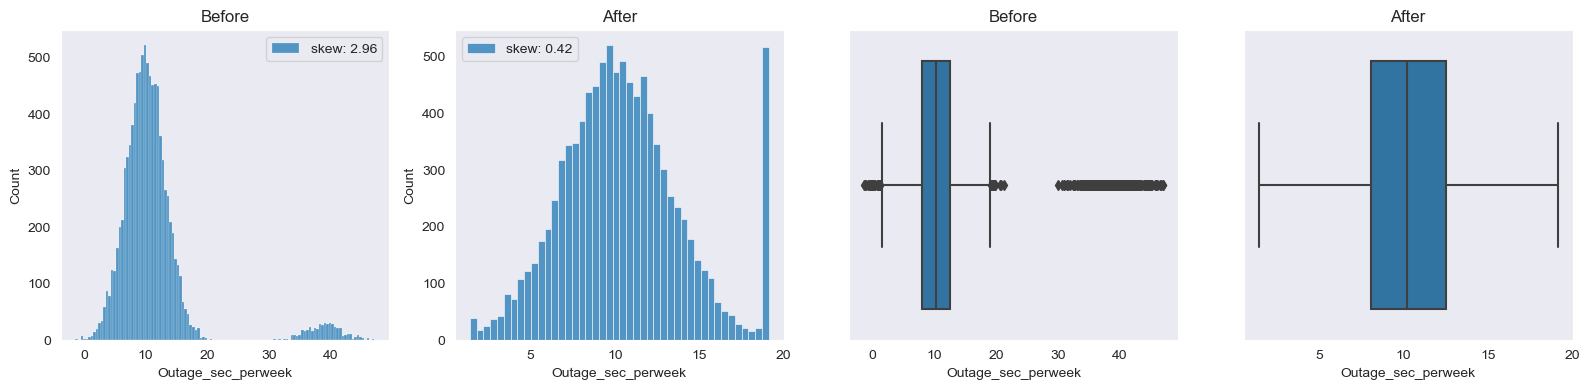

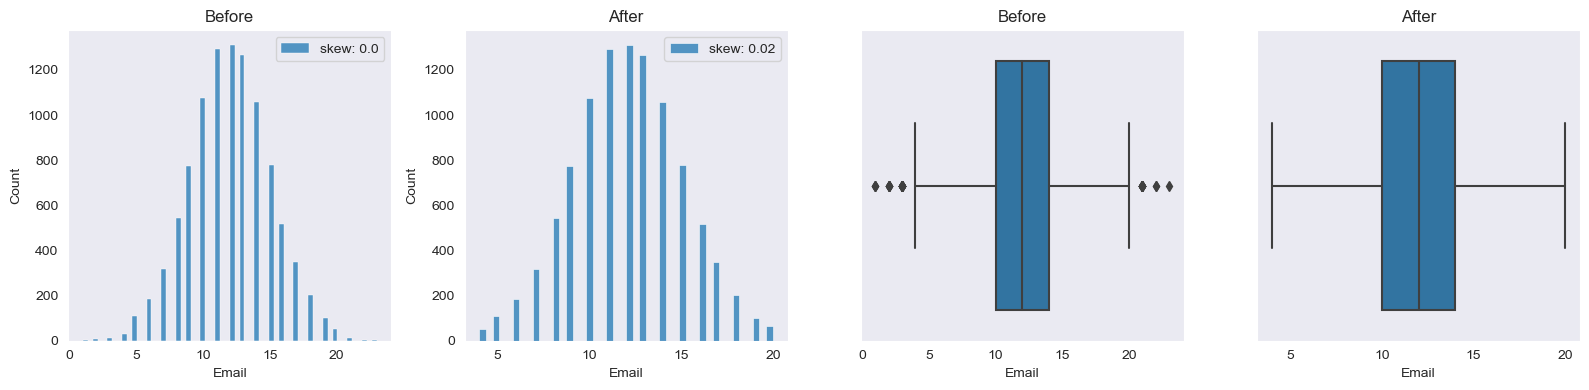

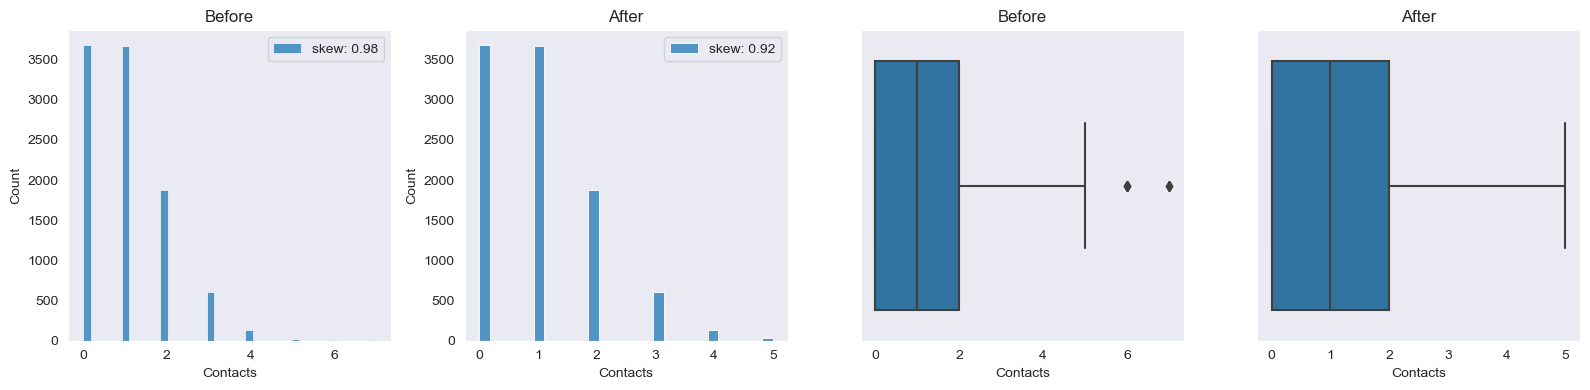

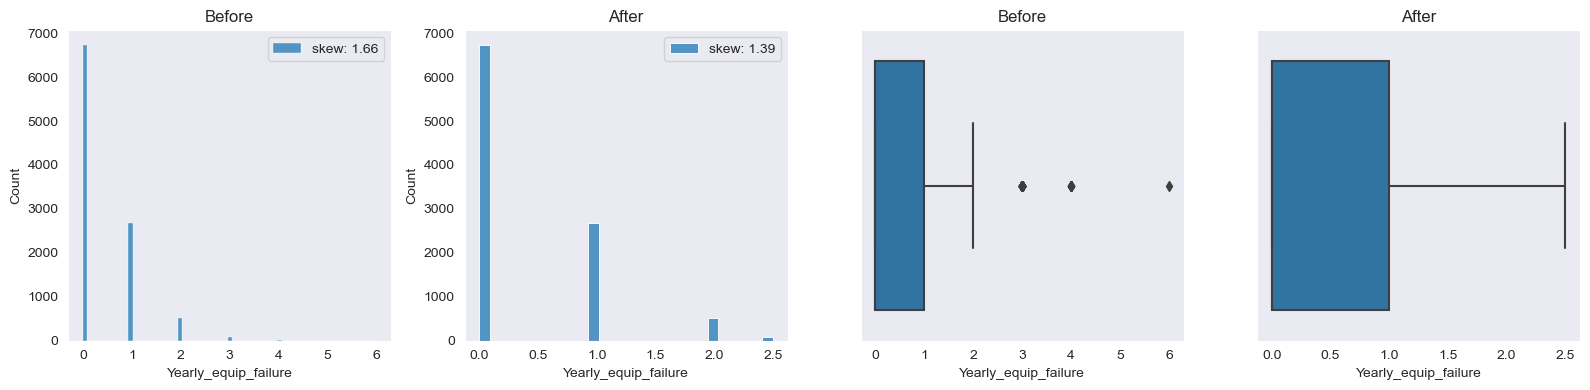

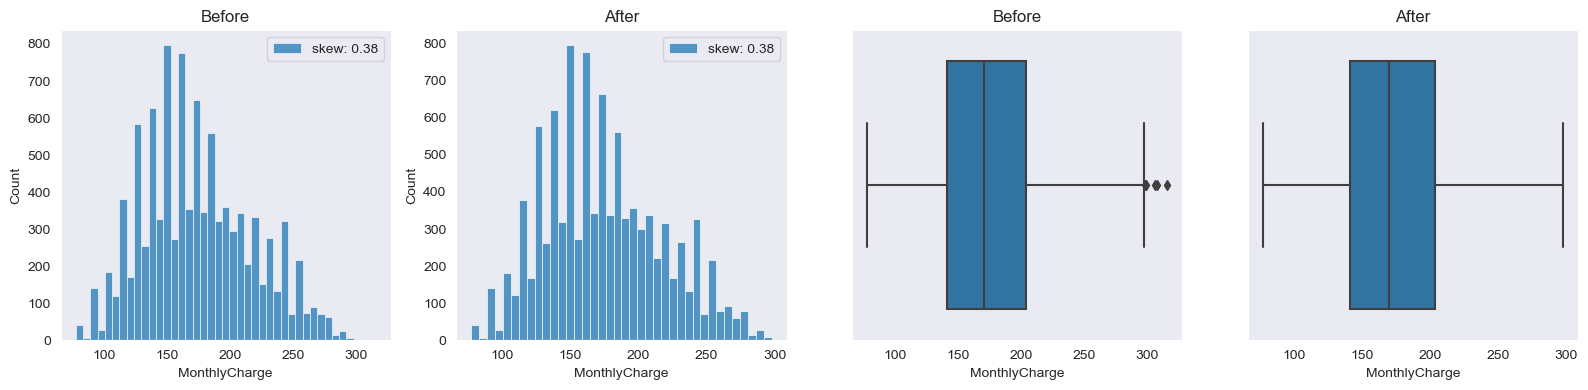

In [50]:
for col in outliers_new:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(df_cop[col], label="skew: " + str(np.round(df_cop[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cop[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [51]:
df_pca = df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [52]:
df_pca_normalized=(df_pca-df_pca.mean())/df_pca.std()

In [53]:
pca= PCA(n_components=df_pca.shape[1])

In [54]:
pca.fit(df_pca_normalized)

PCA(n_components=10)

In [55]:
df_pca2 = pd.DataFrame(pca.transform(df_pca_normalized),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [56]:
loadings = pd.DataFrame(pca.components_.T, 
           columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],
           index=df_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Children,-0.004139,0.016582,0.587107,-0.076214,0.055863,0.497515,0.222553,-0.590580,0.009005,-0.012893
Age,-0.015068,-0.045996,-0.459515,0.442541,-0.094830,0.428960,-0.508076,-0.352799,0.120830,0.021279
Income,0.003922,-0.006157,0.234757,0.305037,0.789949,0.213577,-0.190521,0.375573,-0.069281,0.001287
Outage_sec_perweek,0.024409,0.706553,0.043866,0.026282,0.018605,-0.011707,0.022805,0.070970,0.701080,0.004348
Email,-0.019206,0.066640,-0.235207,-0.593439,-0.070191,0.657520,-0.020693,0.383412,-0.054821,-0.000600
Contacts,0.004077,-0.004411,-0.495105,0.232283,0.251593,0.136724,0.781658,-0.088640,0.005744,-0.002774
Yearly_equip_failure,0.014914,0.055230,0.279716,0.545611,-0.542486,0.262179,0.196050,0.450671,-0.127338,-0.003450
Tenure,0.704905,-0.059699,-0.014595,-0.006603,-0.001816,0.015880,-0.015963,0.002945,0.041689,-0.705005
MonthlyCharge,0.044738,0.697993,-0.090593,0.021219,0.031636,-0.050981,-0.073468,-0.150419,-0.683871,-0.053330
Bandwidth_GB_Year,0.706855,-0.009221,0.001676,-0.017347,0.001177,0.010213,0.002103,-0.007509,-0.018324,0.706728


In [57]:
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

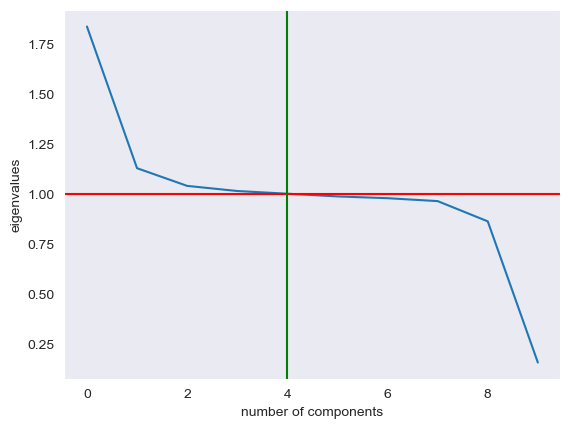

In [58]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.axvline(x=4, color="green")
plt.show()

In [66]:
df.to_csv(r'C:\Users\Marusya\Desktop\Jose_Costa_Churn.csv')